In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
import graphviz

from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
path_features = 'C:\\Belgium test Project\\New Dataset\\features_py\\features.csv'
path_features2 = 'C:\\Belgium test Project\\New Dataset2\\Features\\features.csv'

path_label = 'C:\\Belgium test Project\\New Dataset\\Label\\label.csv'
path_label2 = 'C:\\Belgium test Project\\New Dataset2\\Label\\label.csv'

In [3]:
features = pd.read_csv(path_features)
features2 = pd.read_csv(path_features2)

lab = pd.read_csv(path_label)
lab2 = pd.read_csv(path_label2)

In [4]:
features_all = pd.concat([features,features2],ignore_index = True)
label_all = pd.concat([lab,lab2],ignore_index = True)
label_all_in = label_all['Label']

In [5]:
features_train_s, features_test_s, Label_train_s, Label_test_s = train_test_split(features_all, label_all_in,
                                                                          test_size=0.25, shuffle=True)

In [6]:
parameters = {'criterion':('gini','entropy'), 'max_depth':list(range(5,30))}
forest = RandomForestClassifier()
clf = GridSearchCV(forest,parameters)
clf.fit(features_train_s,Label_train_s)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                       26, 27, 28, 29]})

In [7]:
clf.cv_results_['mean_test_score'].max()

0.9049236298292902

In [8]:
clf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=22)

In [9]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 22}

In [10]:
pred = clf.predict(features_test_s)
cm = confusion_matrix(Label_test_s, pred)

Text(0.5, 1.0, 'Blind test for all features')

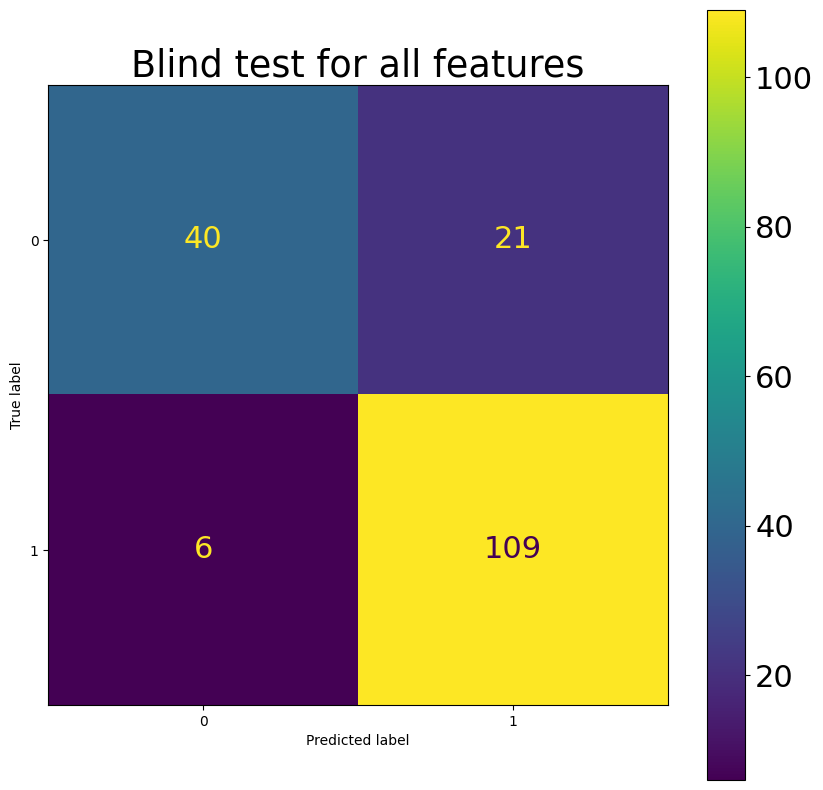

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size': 22})
cm_display = ConfusionMatrixDisplay(cm).plot(ax = ax)
ax.set_title('Blind test for all features')

In [12]:
precision = cm[1,1]/(cm[0,1] + cm[1,1])
accuracy = (cm[1,1] + cm[0,0])/np.sum(cm)
recall = cm[1,1]/(cm[1,0] + cm[1,1])

print('Accuracy is {acc:.2f}%, precision is {pre:.2f}% and recall is {rec:.2f}%.'.format(acc = accuracy*100,pre = precision*100,rec = recall*100))

Accuracy is 84.66%, precision is 83.85% and recall is 94.78%.


In [7]:
from sklearn.feature_selection import f_classif,mutual_info_classif

In [8]:
arr_features_all = features_all.to_numpy()
arr_lab_all = label_all_in.to_numpy()

In [9]:
muinfo = mutual_info_classif(arr_features_all,arr_lab_all)
muinfo

array([0.09581092, 0.22216165, 0.1369318 , 0.21846264, 0.03648213,
       0.18508161, 0.0427556 , 0.16174604, 0.13209124, 0.10509303,
       0.11171374, 0.04753954, 0.11236052, 0.08578205, 0.10677596,
       0.04777915, 0.03502479, 0.00556736, 0.        , 0.05586051,
       0.01365242, 0.03096818, 0.00776129, 0.04154065, 0.03263412,
       0.01972797, 0.00917562, 0.00976369, 0.03098175, 0.08107285,
       0.04130633, 0.03322878, 0.01766078, 0.14163033, 0.01968534,
       0.12671598, 0.03512421, 0.00287524, 0.03153741, 0.00879685,
       0.03818939, 0.03475138, 0.03603347, 0.10444663, 0.02584748,
       0.09275363, 0.05324625, 0.13985524, 0.0357603 , 0.07820095,
       0.00859638, 0.02891559, 0.01078838, 0.01969497, 0.01414559,
       0.04502056, 0.0315373 , 0.06843488, 0.13230794, 0.10025545,
       0.09828883, 0.11095978, 0.09581092, 0.07497043, 0.12471988,
       0.04621599, 0.10575704, 0.10036331, 0.18569582, 0.12519139,
       0.23063162, 0.        , 0.33494946, 0.08396931, 0.09476

In [10]:
features_number = 30
features_name = features_all.columns
ind = np.argpartition(muinfo, -features_number)[-features_number:]
selected_features = features_name[ind]
selected_features

Index(['Closed Euclidean distance from neighbor',
       'Min intensity of mother cell', 'Area of daughter cell',
       'Major axis of daughter cell', 'Mean intensity of mother cell',
       'Minor axis of daughter cell', 'Maximum of Euclidean distance',
       'Variance of Euclidean distance', 'Mean of Euclidean distance',
       'Range of Euclidean distance', 'Mean intensity diff',
       'Mean intensity of daughter cell',
       'Variance of daughter Euclidean distance', 'Area diff',
       'Range of daughter Euclidean distance', 'Range of circularity',
       'Range of major axis', 'Range of minor axis', 'Range of area',
       'Minor axis of mother cell', 'Range of mean intensity',
       'Min intensity of daughter cell', 'Area of mother cell',
       'SD of major axis', 'SD of minor axis', 'SD of area',
       'Major axis of mother cell', 'SD of mean intensity',
       'Min intensity ratio', 'Mean intensity ratio'],
      dtype='object')

In [11]:
def fs_validation_result(features_num_list,all_input_modelf,Classifier = 'Forest'):
    features_name = features.columns
    pd_fs = all_input_modelf.drop(columns = 'Label')
    
    np_all_input_modelf = all_input_modelf.to_numpy()
    np_all_features_modelf = np_all_input_modelf[:,0:-1]
    np_all_labels_modelf = np_all_input_modelf[:,-1]
    
    acc_list = [0]
    precis_list = [0]
    recall_list = [0]
    F1_list = [0]
    cv_results_lst = [0]
    best_param_list = []
    slected_fs_lis = []
    slected_fs_lis_pd = []
    
    muinfo_f = mutual_info_classif(np_all_features_modelf,np_all_labels_modelf)
    features_train_sf, features_test_sf, Label_train_sf, Label_test_sf = train_test_split(pd_fs, np_all_labels_modelf,
                                                                                  test_size=0.25, shuffle=True)
    
    for f in range(0,len(features_num_list) - 1):
        fn = features_num_list[f+1]
        indf = np.argpartition(muinfo_f, -fn)[-fn:]
        selected_fsf = features_name[indf]
        
        selected_ft = features_train_sf[selected_fsf]
        selected_fts = features_test_sf[selected_fsf]
        
        selected_features_train = selected_ft.to_numpy()
        
        selected_features_test = selected_fts.to_numpy()
        
        slected_fs_lis.append(features_name[ind])
        
        parameters = {'criterion':('gini','entropy'), 'max_depth':list(range(5,30))}
        parameters_GNB = {'var_smoothing':[10e-9,10e-7,10e-5,10e-3]}
        parameters_ADA = {'learning_rate':[1,1.5,2,2.5], 'n_estimators':[50,100,150,200]}
        parameters_SVC = {'kernel':('linear','rbf','sigmoid'), 'C':[1,3,5,10]}
        parameters_MLP = {'activation':('tanh','rbf','relu'), 'solver':('lbfgs','sgd','adam'),'max_iter':[200,400,600,800,1000]}
        parameters_QDA = {'tol':[10e-4,10e-3,0.1,1]}
        
        forest = RandomForestClassifier()
        Tree_c = DecisionTreeClassifier()
        QDA = QuadraticDiscriminantAnalysis()
        KNN_c = KNeighborsClassifier()
        ADA_Boost = AdaBoostClassifier()
        SVC_c = SVC()
        MLP = MLPClassifier()
        GNB = GaussianNB()
        
        
        
        if Classifier == 'Forest':
            clf_fsf = GridSearchCV(forest,parameters,cv = 10)
        if Classifier == 'Tree':
            clf_fsf = GridSearchCV(Tree_c,parameters,cv = 10)
        if Classifier == 'GNB':
            clf_fsf = GridSearchCV(GNB,parameters_GNB,cv = 10)
        if Classifier == 'QDA':
            clf_fsf = GridSearchCV(QDA,parameters_QDA,cv = 10)
        if Classifier == 'ADA':
            clf_fsf = GridSearchCV(ADA_Boost,parameters_ADA,cv = 10)
        if Classifier == 'SVC':
            clf_fsf = GridSearchCV(SVC_c,parameters_SVC,cv = 10)
        if Classifier == 'MLP':
            clf_fsf = GridSearchCV(MLP,parameters_MLP,cv = 10)
            
        clf_fsf.fit(selected_features_train,Label_train_sf)
        
        cv_results_lst.append(clf_fsf.cv_results_['mean_test_score'].max())
        
        chosen_param_fsf = clf_fsf.best_params_
        best_param_list.append(chosen_param_fsf)
        
        chosen_model_fsf = clf_fsf.best_estimator_
        trained_model_fsf = chosen_model_fsf.fit(selected_features_train,Label_train_sf)
        
        blind_pred_fsf = trained_model_fsf.predict(selected_features_test)
        
        cm_fsf = confusion_matrix(Label_test_sf, blind_pred_fsf)
        precision_fsf = cm_fsf[1,1]/(cm_fsf[0,1] + cm_fsf[1,1])
        accuracy_fsf = (cm_fsf[1,1] + cm_fsf[0,0])/np.sum(cm_fsf)
        recall_fsf = cm_fsf[1,1]/(cm_fsf[1,0] + cm_fsf[1,1])
        
        print('From ' + str(fn) + ' selected features. ' + 'Accuracy is {acc:.2f}%, precision is {pre:.2f}% and recall is {rec:.2f}%.'.format(acc = accuracy_fsf*100,pre = precision_fsf*100,rec = recall_fsf*100))
        
        acc_list.append(accuracy_fsf)
        precis_list.append(precision_fsf)
        recall_list.append(recall_fsf)
        F1_list.append((2*precision_fsf*recall_fsf)/(recall_fsf + precision_fsf))
        
    return(acc_list,precis_list,recall_list,F1_list,best_param_list,slected_fs_lis,features_train_sf,Label_train_sf)
        

In [13]:
input_all = pd.concat([features_all,label_all_in],axis = 1)

In [14]:
fs_list = [0,1,2,5,10,15,20,25,30]
fs_result = fs_validation_result(fs_list,input_all,'Forest')

From 1 selected features. Accuracy is 83.52%, precision is 86.92% and recall is 86.11%.
From 2 selected features. Accuracy is 85.23%, precision is 87.27% and recall is 88.89%.
From 5 selected features. Accuracy is 85.23%, precision is 89.42% and recall is 86.11%.
From 10 selected features. Accuracy is 84.66%, precision is 88.57% and recall is 86.11%.
From 15 selected features. Accuracy is 86.36%, precision is 88.89% and recall is 88.89%.
From 20 selected features. Accuracy is 86.36%, precision is 88.89% and recall is 88.89%.
From 25 selected features. Accuracy is 86.36%, precision is 88.89% and recall is 88.89%.
From 30 selected features. Accuracy is 85.80%, precision is 88.79% and recall is 87.96%.


In [20]:
np_fsl = np.asarray(fs_list)
np_acc = np.asarray(fs_result[0])
np_pre = np.asarray(fs_result[1])
np_rec = np.asarray(fs_result[2])
np_F1 = np.asarray(fs_result[3])

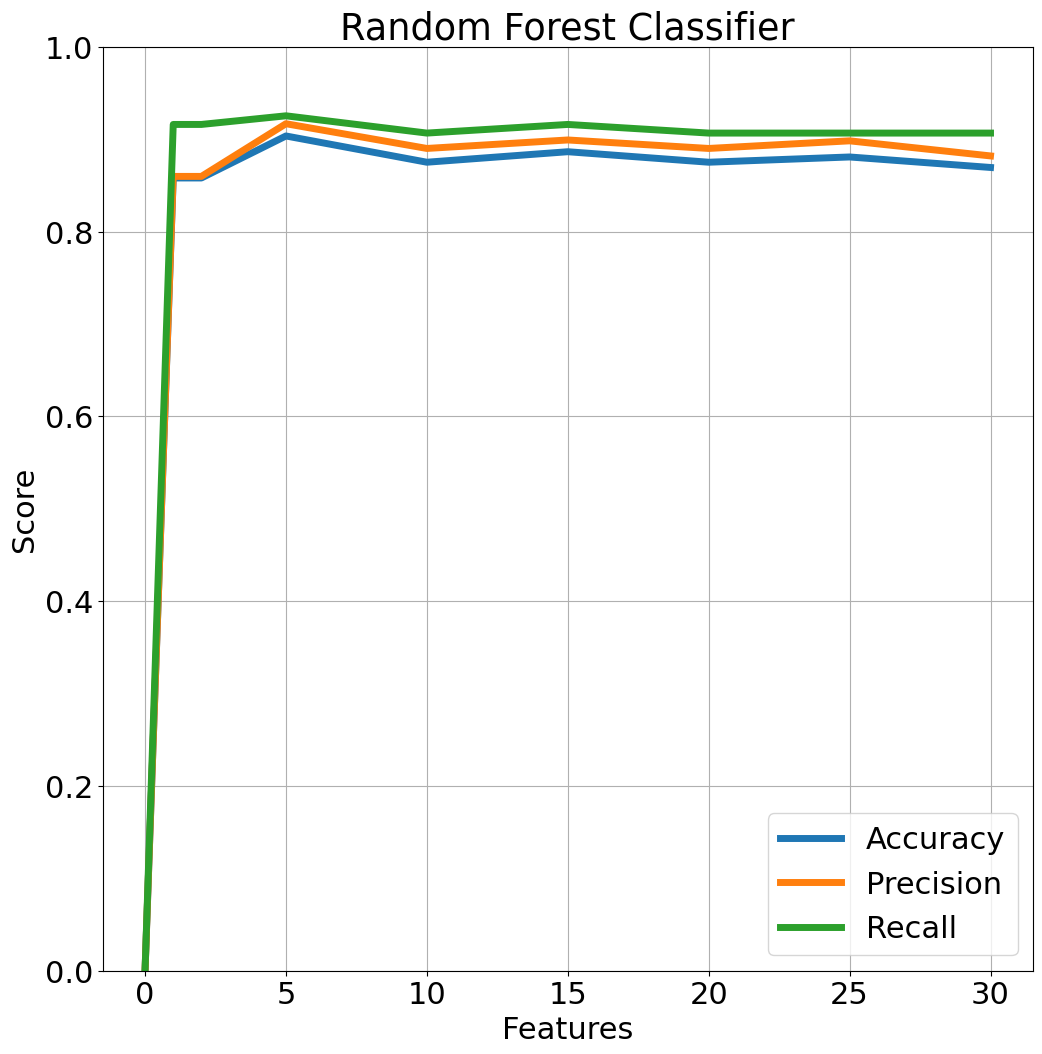

In [21]:
plt.figure(figsize = (12,12))
plt.rcParams.update({'font.size': 22})
plt.plot(np_fsl,np_acc,linewidth=5)
plt.plot(np_fsl,np_pre,linewidth=5)
plt.plot(np_fsl,np_rec,linewidth=5)
plt.legend(['Accuracy','Precision','Recall'])
plt.xlabel('Features')
plt.ylabel('Score')
plt.title('Random Forest Classifier')
plt.ylim(0,1)
plt.grid(True)
plt.show()

In [22]:
np_F1

array([0.        , 0.88687783, 0.88687783, 0.92093023, 0.89814815,
       0.90740741, 0.89814815, 0.90232558, 0.89400922])

In [23]:
fst_result = fs_validation_result(fs_list,input_all,'Tree')

From 1 selected features. Accuracy is 84.66%, precision is 86.72% and recall is 91.74%.
From 2 selected features. Accuracy is 84.66%, precision is 89.83% and recall is 87.60%.
From 5 selected features. Accuracy is 82.95%, precision is 86.99% and recall is 88.43%.
From 10 selected features. Accuracy is 81.82%, precision is 87.39% and recall is 85.95%.
From 15 selected features. Accuracy is 83.52%, precision is 86.51% and recall is 90.08%.
From 20 selected features. Accuracy is 85.23%, precision is 88.00% and recall is 90.91%.
From 25 selected features. Accuracy is 83.52%, precision is 91.07% and recall is 84.30%.
From 30 selected features. Accuracy is 85.23%, precision is 92.79% and recall is 85.12%.


In [24]:
np_fslt = np.asarray(fs_list)
np_acct = np.asarray(fst_result[0])
np_pret = np.asarray(fst_result[1])
np_rect = np.asarray(fst_result[2])
np_F1t = np.asarray(fst_result[3])

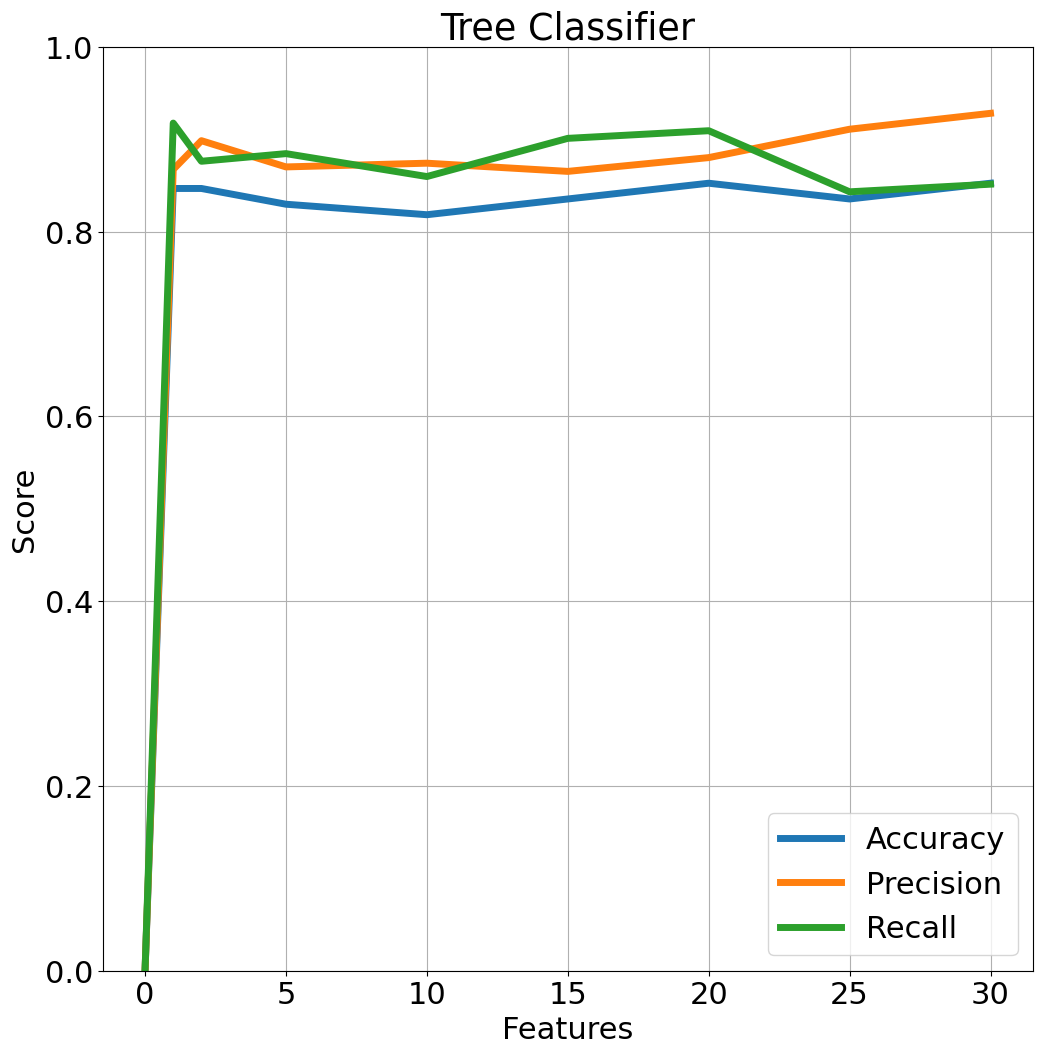

In [25]:
plt.figure(figsize = (12,12))
plt.rcParams.update({'font.size': 22})
plt.plot(np_fslt,np_acct,linewidth=5)
plt.plot(np_fslt,np_pret,linewidth=5)
plt.plot(np_fslt,np_rect,linewidth=5)
plt.legend(['Accuracy','Precision','Recall'])
plt.xlabel('Features')
plt.ylabel('Score')
plt.title('Tree Classifier')
plt.ylim(0,1)
plt.grid(True)
plt.show()

In [26]:
fs_result_knn = fs_validation_result(fs_list,input_all,'GNB')

From 1 selected features. Accuracy is 85.23%, precision is 89.58% and recall is 84.31%.
From 2 selected features. Accuracy is 84.09%, precision is 91.11% and recall is 80.39%.
From 5 selected features. Accuracy is 86.36%, precision is 92.39% and recall is 83.33%.
From 10 selected features. Accuracy is 86.36%, precision is 92.39% and recall is 83.33%.
From 15 selected features. Accuracy is 86.36%, precision is 88.24% and recall is 88.24%.
From 20 selected features. Accuracy is 76.70%, precision is 77.98% and recall is 83.33%.
From 25 selected features. Accuracy is 79.55%, precision is 80.56% and recall is 85.29%.
From 30 selected features. Accuracy is 78.41%, precision is 81.37% and recall is 81.37%.


In [27]:
np_fsl_knn = np.asarray(fs_list)
np_acc_knn = np.asarray(fs_result_knn[0])
np_pre_knn = np.asarray(fs_result_knn[1])
np_rec_knn = np.asarray(fs_result_knn[2])
np_F1_knn = np.asarray(fs_result_knn[3])

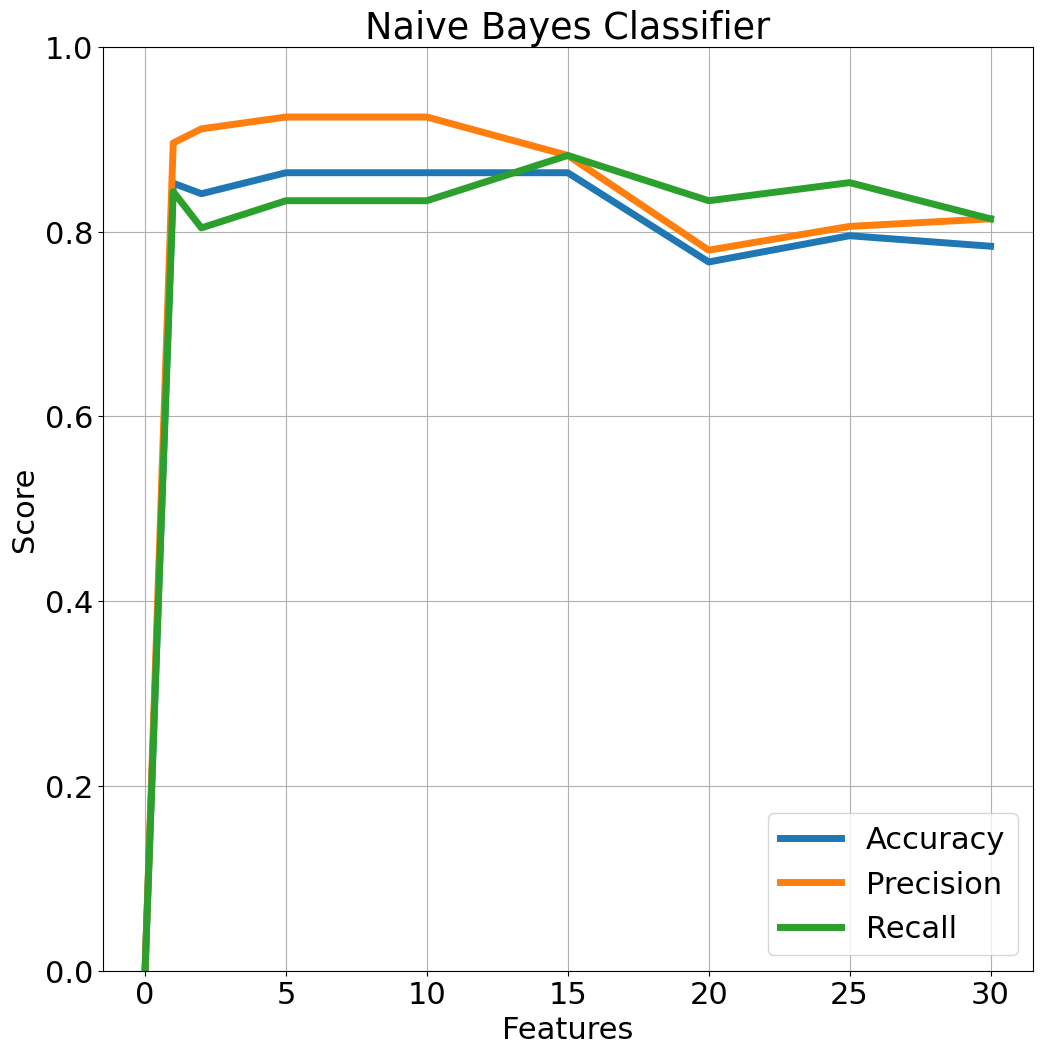

In [28]:
plt.figure(figsize = (12,12))
plt.rcParams.update({'font.size': 22})
plt.plot(np_fsl_knn,np_acc_knn,linewidth=5)
plt.plot(np_fsl_knn,np_pre_knn,linewidth=5)
plt.plot(np_fsl_knn,np_rec_knn,linewidth=5)
plt.legend(['Accuracy','Precision','Recall'])
plt.xlabel('Features')
plt.ylabel('Score')
plt.title('Naive Bayes Classifier')
plt.ylim(0,1)
plt.grid(True)
plt.show()

In [29]:
fs_result_qda = fs_validation_result(fs_list,input_all,'QDA')

From 1 selected features. Accuracy is 80.11%, precision is 87.62% and recall is 80.70%.
From 2 selected features. Accuracy is 79.55%, precision is 89.00% and recall is 78.07%.
From 5 selected features. Accuracy is 83.52%, precision is 89.72% and recall is 84.21%.
From 10 selected features. Accuracy is 82.95%, precision is 88.18% and recall is 85.09%.
From 15 selected features. Accuracy is 84.09%, precision is 87.72% and recall is 87.72%.
From 20 selected features. Accuracy is 64.77%, precision is 67.33% and recall is 88.60%.


C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\u015828

From 25 selected features. Accuracy is 73.86%, precision is 79.31% and recall is 80.70%.
From 30 selected features. Accuracy is 77.84%, precision is 85.71% and recall is 78.95%.


C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\u015828

In [30]:
np_fsl_qda = np.asarray(fs_list)
np_acc_qda = np.asarray(fs_result_qda[0])
np_pre_qda = np.asarray(fs_result_qda[1])
np_rec_qda = np.asarray(fs_result_qda[2])
np_F1_qda = np.asarray(fs_result_qda[3])

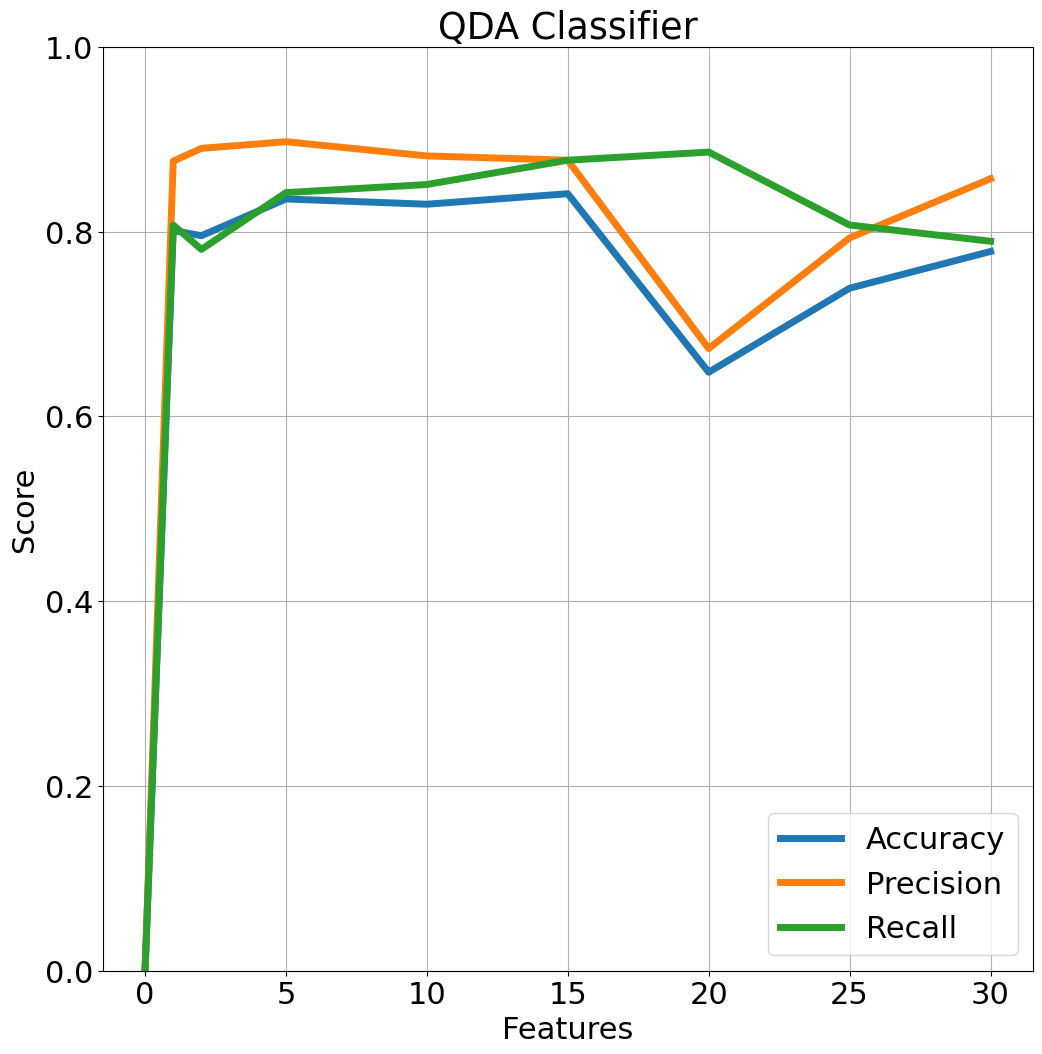

In [31]:
plt.figure(figsize = (12,12))
plt.rcParams.update({'font.size': 22})
plt.plot(np_fsl_qda,np_acc_qda,linewidth=5)
plt.plot(np_fsl_qda,np_pre_qda,linewidth=5)
plt.plot(np_fsl_qda,np_rec_qda,linewidth=5)
plt.legend(['Accuracy','Precision','Recall'])
plt.xlabel('Features')
plt.ylabel('Score')
plt.title('QDA Classifier')
plt.ylim(0,1)
plt.grid(True)
plt.show()

In [32]:
fs_result_ada = fs_validation_result(fs_list,input_all,'ADA')

From 1 selected features. Accuracy is 86.36%, precision is 88.70% and recall is 90.27%.
From 2 selected features. Accuracy is 88.64%, precision is 87.80% and recall is 95.58%.
From 5 selected features. Accuracy is 84.66%, precision is 86.44% and recall is 90.27%.
From 10 selected features. Accuracy is 85.80%, precision is 86.67% and recall is 92.04%.
From 15 selected features. Accuracy is 84.66%, precision is 86.44% and recall is 90.27%.
From 20 selected features. Accuracy is 86.36%, precision is 90.83% and recall is 87.61%.
From 25 selected features. Accuracy is 86.93%, precision is 88.14% and recall is 92.04%.
From 30 selected features. Accuracy is 87.50%, precision is 88.89% and recall is 92.04%.


In [33]:
np_fsl_ada = np.asarray(fs_list)
np_acc_ada = np.asarray(fs_result_ada[0])
np_pre_ada = np.asarray(fs_result_ada[1])
np_rec_ada = np.asarray(fs_result_ada[2])
np_F1_ada = np.asarray(fs_result_ada[3])

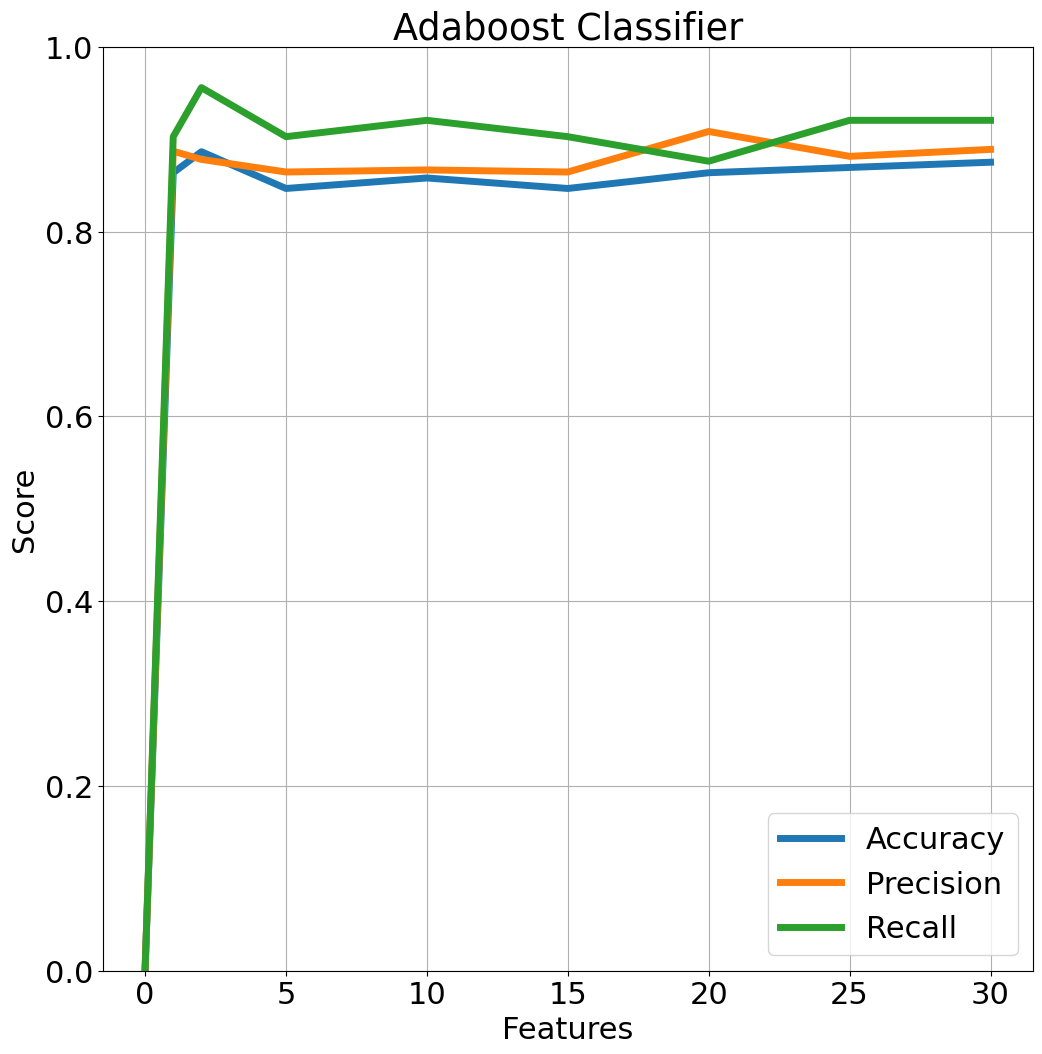

In [34]:
plt.figure(figsize = (12,12))
plt.rcParams.update({'font.size': 22})
plt.plot(np_fsl_ada,np_acc_ada,linewidth=5)
plt.plot(np_fsl_ada,np_pre_ada,linewidth=5)
plt.plot(np_fsl_ada,np_rec_ada,linewidth=5)
plt.legend(['Accuracy','Precision','Recall'])
plt.xlabel('Features')
plt.ylabel('Score')
plt.title('Adaboost Classifier')
plt.ylim(0,1)
plt.grid(True)
plt.show()

In [ ]:
fs_result_svc = fs_validation_result(fs_list,input_all,'SVC')

From 1 selected features. Accuracy is 91.48%, precision is 91.35% and recall is 94.06%.
From 2 selected features. Accuracy is 91.48%, precision is 90.57% and recall is 95.05%.
From 5 selected features. Accuracy is 85.80%, precision is 83.93% and recall is 93.07%.
From 10 selected features. Accuracy is 89.20%, precision is 91.00% and recall is 90.10%.
From 15 selected features. Accuracy is 85.80%, precision is 85.85% and recall is 90.10%.


In [ ]:
np_fsl_svc = np.asarray(fs_list)
np_acc_svc = np.asarray(fs_result_svc[0])
np_pre_svc = np.asarray(fs_result_svc[1])
np_rec_svc = np.asarray(fs_result_svc[2])
np_F1_svc = np.asarray(fs_result_svc[3])

In [ ]:
plt.figure(figsize = (12,12))
plt.rcParams.update({'font.size': 22})
plt.plot(np_fsl_svc,np_acc_svc,linewidth=5)
plt.plot(np_fsl_svc,np_pre_svc,linewidth=5)
plt.plot(np_fsl_svc,np_rec_svc,linewidth=5)
plt.legend(['Accuracy','Precision','Recall'])
plt.xlabel('Features')
plt.ylabel('Score')
plt.title('SVM Classifier')
plt.ylim(0,1)
plt.grid(True)
plt.show()

In [38]:
fs_result_mlp = fs_validation_result(fs_list,input_all,'MLP')

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarn

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarn

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


From 1 selected features. Accuracy is 87.50%, precision is 89.57% and recall is 91.15%.


C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarn

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarn

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 752, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 384, in _fit
    self._

From 2 selected features. Accuracy is 87.50%, precision is 90.27% and recall is 90.27%.


C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 752, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 384, in _fit
    self._

From 5 selected features. Accuracy is 89.20%, precision is 91.23% and recall is 92.04%.


C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

From 10 selected features. Accuracy is 86.93%, precision is 91.67% and recall is 87.61%.


C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


From 15 selected features. Accuracy is 85.23%, precision is 90.65% and recall is 85.84%.


C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

From 20 selected features. Accuracy is 80.11%, precision is 79.55% and recall is 92.92%.


C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) rea

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

From 25 selected features. Accuracy is 76.70%, precision is 77.69% and recall is 89.38%.


C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

From 30 selected features. Accuracy is 78.41%, precision is 80.00% and recall is 88.50%.


C:\Users\u0158287\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [39]:
np_fsl_mlp = np.asarray(fs_list)
np_acc_mlp = np.asarray(fs_result_mlp[0])
np_pre_mlp = np.asarray(fs_result_mlp[1])
np_rec_mlp = np.asarray(fs_result_mlp[2])
np_F1_mlp = np.asarray(fs_result_mlp[3])

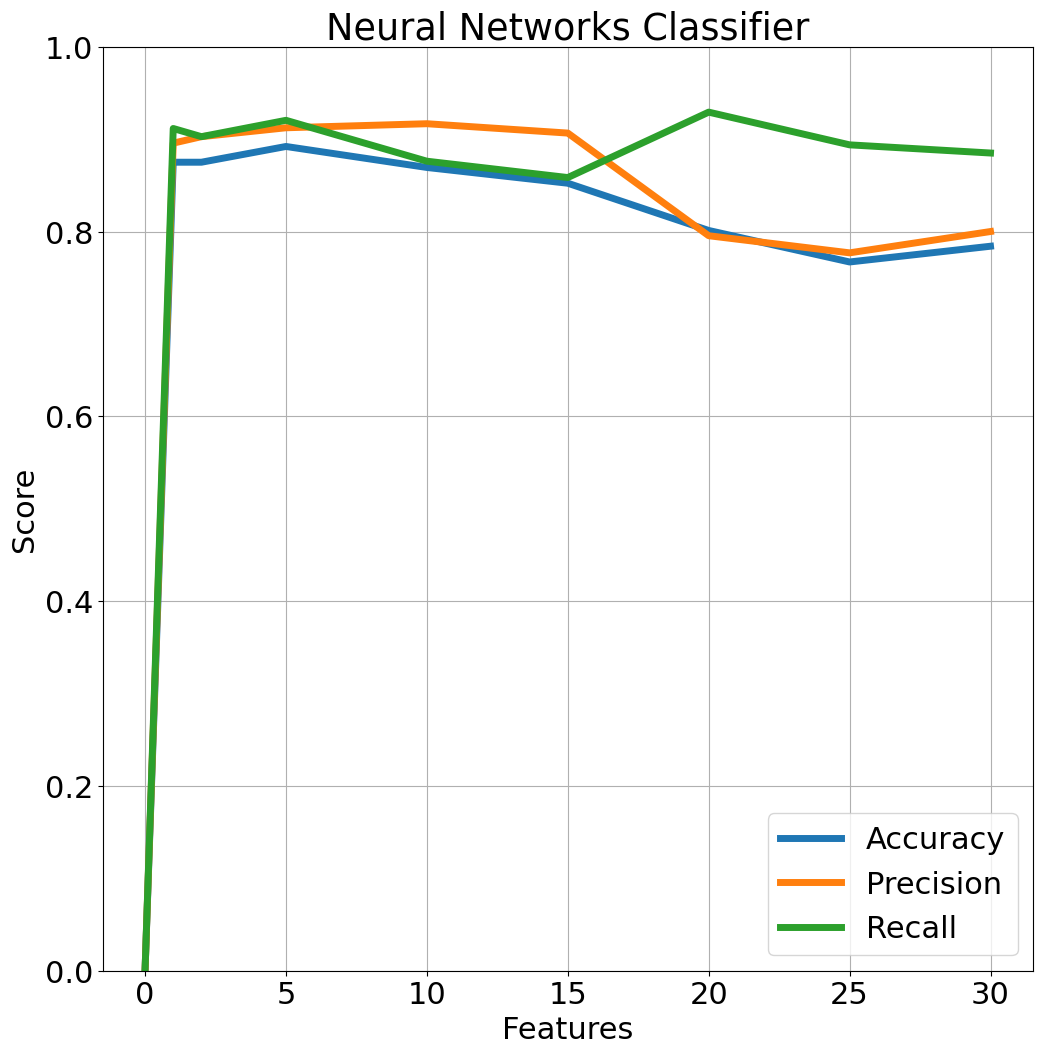

In [40]:
plt.figure(figsize = (12,12))
plt.rcParams.update({'font.size': 22})
plt.plot(np_fsl_mlp,np_acc_mlp,linewidth=5)
plt.plot(np_fsl_mlp,np_pre_mlp,linewidth=5)
plt.plot(np_fsl_mlp,np_rec_mlp,linewidth=5)
plt.legend(['Accuracy','Precision','Recall'])
plt.xlabel('Features')
plt.ylabel('Score')
plt.ylim(0,1)
plt.title('Neural Networks Classifier')
plt.grid(True)
plt.show()